In [1]:
def func(file_loc,header_row_number=0):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    if header_row_number==0: 
        df=pd.read_csv(file_loc)
        
    else:
        df=pd.read_csv(file_loc,header=header_row_number)
    print(df.head(3))
        # Data Cleaning & Exploratory Analysis
             # Identify categorical and continuous variables
    categorical_vars = df.select_dtypes(include=['object']).columns
    for i in categorical_vars:
        df[i] = df[i].astype('category').cat.codes
            
    continuous_vars = df.select_dtypes(exclude=['object']).columns
    # Check for missing values in each column
    missing_values = df.isnull().any()
    if str(missing_values[missing_values].index.tolist())!='[]':
            # Display the result
        print("\nColumns with Missing Values:")
        print(missing_values[missing_values].index.tolist())

        # Example: Histogram for a numerical column
    for j in continuous_vars:
        sns.histplot(df[j], bins=20)
        plt.title('Distribution of Numerical Column')
        plt.show()

        # Example: Countplot for a categorical column
    for i in categorical_vars:
        sns.countplot(x=i, data=df)
        plt.title('Count of Each Category in Categorical Column')
        plt.show()
    
    target=str(input(' specify column that you want to use as target'+'\nHere are the list of columns to choose from: '+str(df.columns)))
    id_col=str(input(' specify ID column: '))
    if id_col in df.columns:
        X = df.drop(target, axis=1).drop(id_col,axis=1)
        y = df[target]
    else:
        X = df.drop(target, axis=1)
        y = df[target]
        # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Display the shapes of the resulting datasets
    print("Training set shape:", X_train.shape, y_train.shape)
    print("Testing set shape:", X_test.shape, y_test.shape)
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

        # Replace 'your_target_column' with the actual column you're trying to predict
        # Replace 'your_n_estimators' with the desired number of trees in the forest
        # Replace other hyperparameters based on your specific requirements
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

        # Train the Random Forest model
    clf.fit(X_train, y_train)

        # Make predictions on the test set
    y_pred = clf.predict(X_test)

        # Evaluate the model performance
        
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

        # You can further explore other metrics or perform hyperparameter tuning as needed
    from sklearn.metrics import precision_score, recall_score, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

        # Assuming you've already trained the Random Forest model (clf) and made predictions (y_pred)

        # Calculate precision and recall
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred,average='micro')

    print("Precision:", precision)
    print("Recall:", recall)

        # Draw a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

        # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False
                #,xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1']
               )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
        # Assuming 'id' is the name of your ID column
    id_column = id_col

        # Create a DataFrame with the IDs and corresponding predictions
    prediction_df = pd.DataFrame({'ID': id_column, 'prediction': y_pred})

        # Merge the prediction DataFrame with the original DataFrame on the 'id' column
    result_df = pd.concat([df, prediction_df],ignore_index=True )

        # Display the resulting DataFrame
        # Save the prediction result to a CSV file
    prediction_df.to_csv('prediction_result.csv', index=False)
    print("Prediction output is stored in prediction_result.csv")
        # Save the complete result to a CSV file
    #result_df.to_csv('complete_prediction_result.csv', index=False)
    notebook_name = 'Open Source Library work.ipynb'
    output_file_name = 'output.html'

    exporter = HTMLExporter()
    output_notebook = nbformat.read(notebook_name, as_version=4)

    output, resources = exporter.from_notebook_node(output_notebook)
    codecs.open(output_file_name, 'w', encoding='utf-8').write(output)
    print("Your file containing the output is stored in output.html")

                NEIGHBORHOOD                                 TYPE OF HOME  \
0  CHELSEA                    02 TWO FAMILY HOMES                           
1  CHELSEA                    03 THREE FAMILY HOMES                         
2  EAST VILLAGE               01 ONE FAMILY HOMES                           

   TOTAL NO. OF PROPERTIES  NUMBER OF SALES  LOWEST SALE PRICE  \
0                       81                2           995000.0   
1                       64                1          3800000.0   
2                       22                1          7926432.0   

   AVERAGE SALE PRICE  MEDIAN SALE PRICE  HIGHEST SALE PRICE  
0           2872500.0          2872500.0           4750000.0  
1           3800000.0          3800000.0           3800000.0  
2           7926432.0          7926432.0           7926432.0  


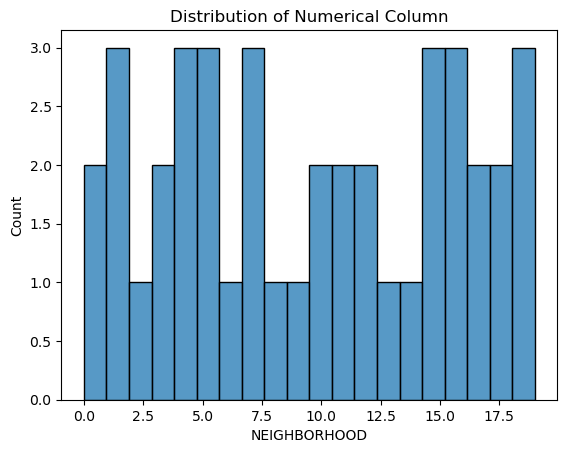

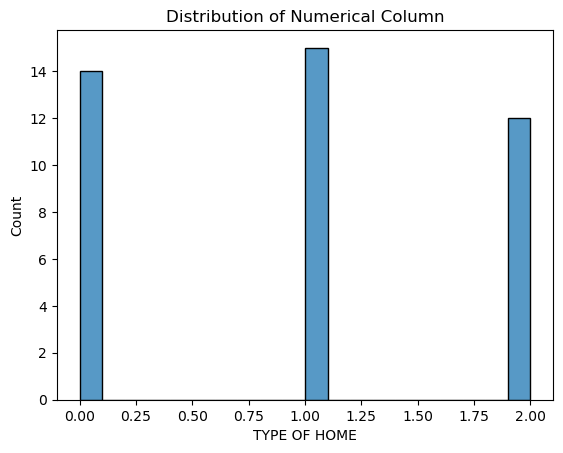

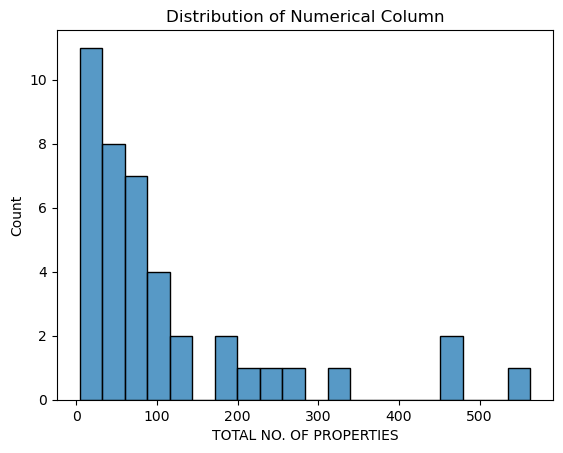

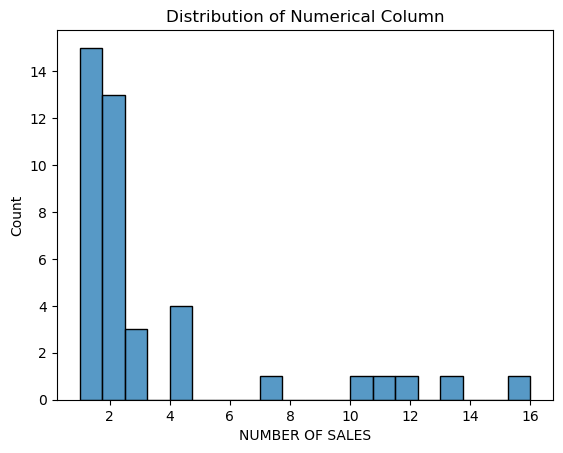

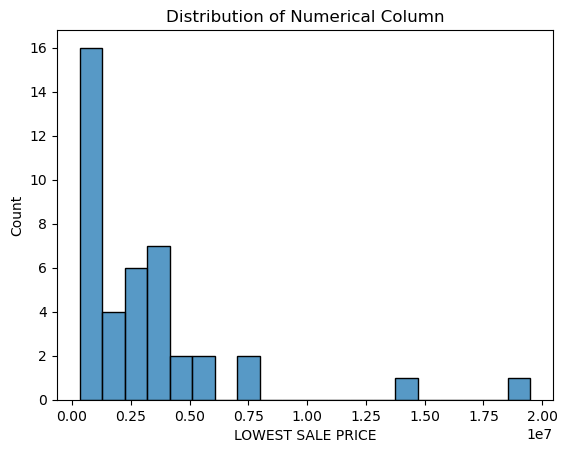

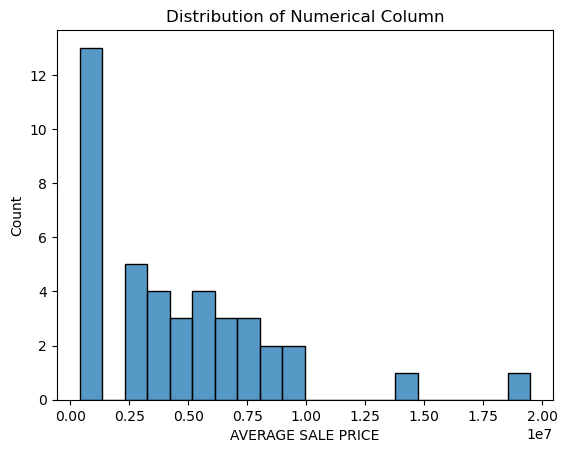

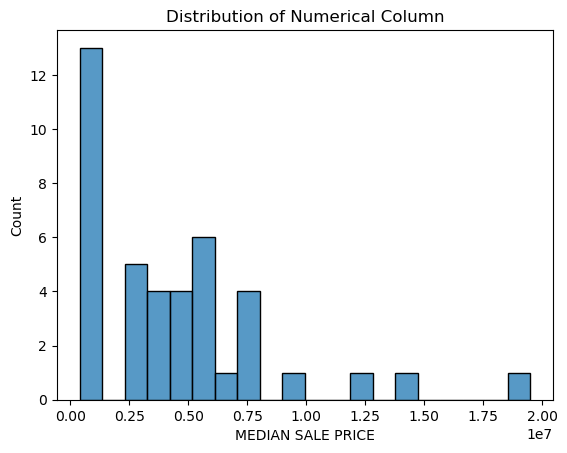

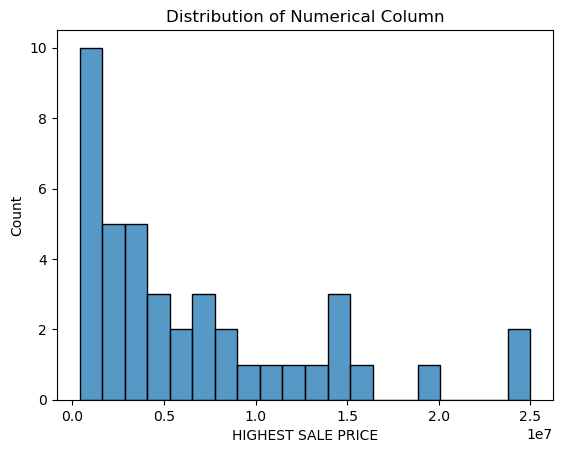

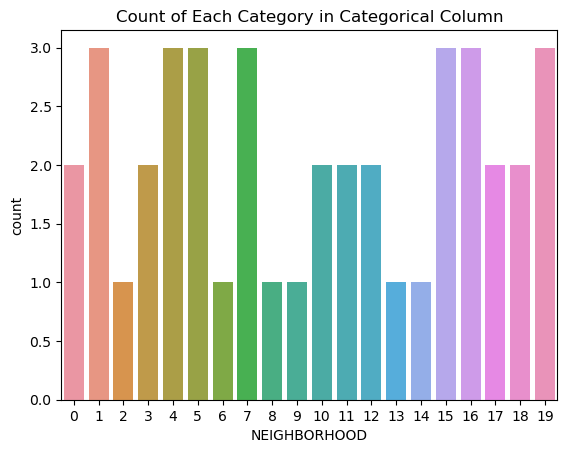

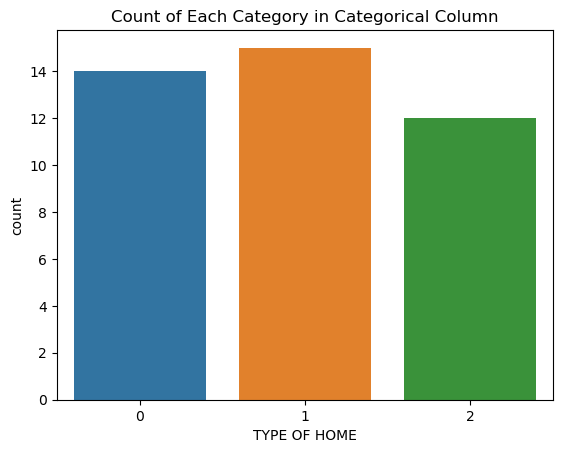

 specify column that you want to use as target
Here are the list of columns to choose from: Index(['NEIGHBORHOOD', 'TYPE OF HOME', 'TOTAL NO. OF PROPERTIES',
       'NUMBER OF SALES', 'LOWEST SALE PRICE', 'AVERAGE SALE PRICE',
       'MEDIAN SALE PRICE', 'HIGHEST SALE PRICE'],
      dtype='object')NEIGHBORHOOD
 specify ID column: FDF
Training set shape: (28, 7) (28,)
Testing set shape: (13, 7) (13,)
Accuracy: 0.3076923076923077
Precision: 0.3076923076923077
Recall: 0.3076923076923077


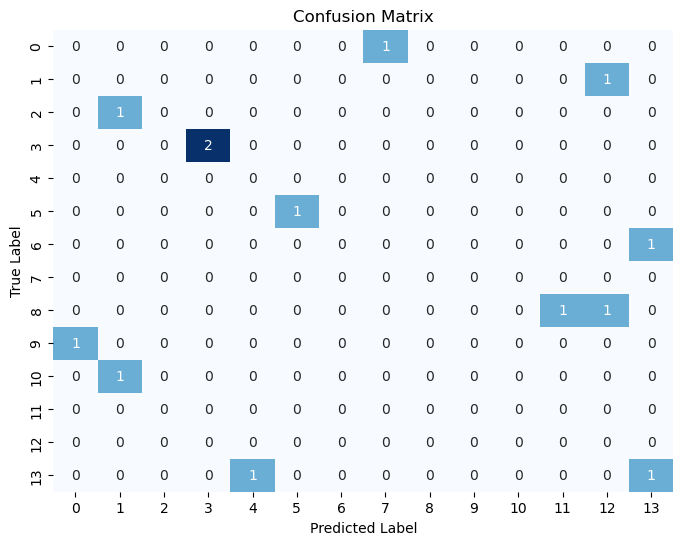

Prediction output is stored in prediction_result.csv


NameError: name 'HTMLExporter' is not defined

In [3]:
#func('Downloads/Harrisburg and CSV files for Jupyter/csv files for jupyter/default of credit card clients.csv')
func('/Users/mukundansankar1/Downloads/Harrisburg and CSV files for Jupyter/data interview - predictive labs dataset/dof-summary-of-neighborhood-sales-for-manhattan-for-class-1-2-and-3-family-homes-2009-1.csv')